In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV files into DataFrames
oe_df = pd.read_csv('oe_events.csv')
mc_df = pd.read_csv('mc_events.csv')
tf_df = pd.read_csv('tf_events.csv')

# Combine all datasets for comparison
tf_df['Dataset'] = 'True/False'
oe_df['Dataset'] = 'Open-Ended'
mc_df['Dataset'] = 'Multiple Choice'
combined_df = pd.concat([tf_df, oe_df, mc_df], ignore_index=True)
# Ensure 'Compared_Answer' is correctly interpreted as a boolean
combined_df['Correct'] = combined_df['Compared_Answer'] == 1

# Check if the 'Correct' column is correctly calculated
print(combined_df[['Compared_Answer', 'Correct']].head())

combined_df

   Compared_Answer  Correct
0                1     True
1                1     True
2                1     True
3                1     True
4                1     True


,Question,Model_Answer,Actual_Answer,Compared_Answer,Language,Time_Taken,question_type,Dataset,Correct_Answer,Options,Correct_Letter,Correct
0,The event 'Battle of White Oak Swamp' took pla...,Comment: False. The Battle of White,False,1,EN,1.343086,Location,True/False,NaN,NaN,NaN,True
1,The event 'Battle of White Oak Swamp' occurred...,Answer: False.\n\nThe,False,1,EN,0.578549,Year,True/False,NaN,NaN,NaN,True
2,The event 'Battle of Springfield' took place i...,Comment: False. The Battle of Spring,False,1,EN,0.577110,Location,True/False,NaN,NaN,NaN,True
3,The event 'Battle of Springfield' occurred in ...,False. The Battle of Springfield occurred,False,1,EN,0.577460,Year,True/False,NaN,NaN,NaN,True
4,The event 'Battle of la Truyère' took place in...,Comment: False. The Battle of la,False,1,EN,0.577113,Location,True/False,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
59445,'Battle of Roppagawa' olayı hangi yıl gerçekle...,Answer: A: 471.0\n\nExplanation: The Battle of...,NaN,0,TR,1.381033,Year,Multiple Choice,NaN,"{'A': 471.0, 'B': 1579.0, 'C': 1732.0, 'D': 45...",B,False
59446,'Battle at the Harzhorn' olayı hangi yıl gerçe...,Answer: D. The Battle at the Harzhorn took pla...,NaN,0,TR,1.330763,Year,Multiple Choice,NaN,"{'A': 47.0, 'B': 736.0, 'C': 235.0, 'D': 1936.0}",C,False
59447,'Battle of Gilgal Church' olayı hangi yıl gerç...,Answer: C. The Battle of Gilgal Church took pl...,NaN,1,TR,1.280932,Year,Multiple Choice,NaN,"{'A': 1517.0, 'B': 1590.0, 'C': 841.0, 'D': 18...",D,True
59448,'coronation of Queen Elizabeth I' olayı hangi ...,Answer: C: 1559.0\n\nExplanation: The coronati...,NaN,1,TR,1.378770,Year,Multiple Choice,NaN,"{'A': 2022.0, 'B': 1043.0, 'C': 1559.0, 'D': 1...",C,True


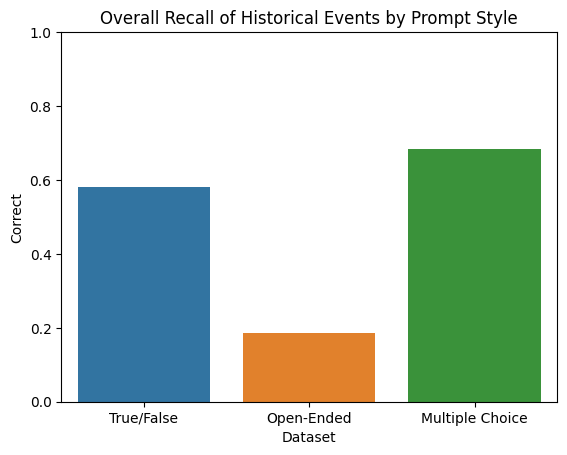

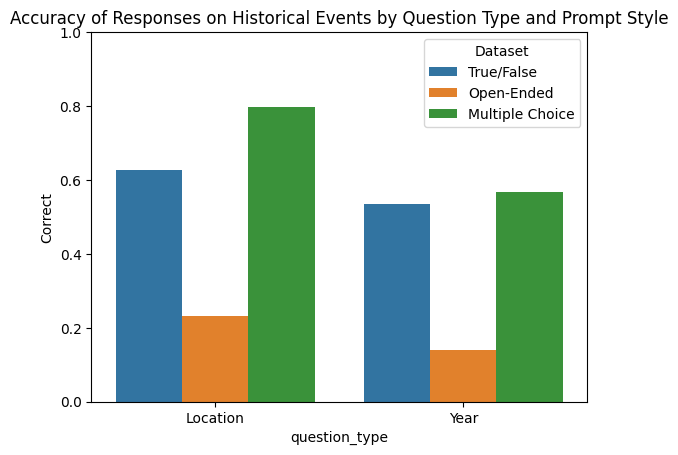

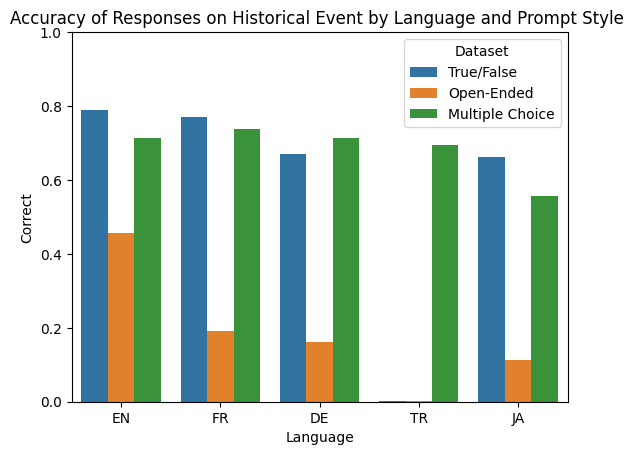

The biggest difference in accuracy is for language: TR with a difference of 0.6914294415502039


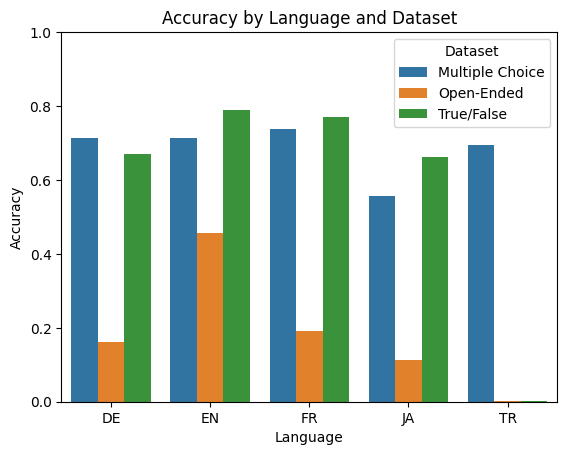

In [3]:
# Plot overall accuracy by dataset
sns.barplot(x='Dataset', y='Correct', data=combined_df, ci=None)
plt.title('Overall Recall of Historical Events by Prompt Style')
plt.ylim(0, 1)
plt.show()

# Plot accuracy by question type and dataset
sns.barplot(x='question_type', y='Correct', hue='Dataset', data=combined_df, ci=None)
plt.title('Accuracy of Responses on Historical Events by Question Type and Prompt Style')
plt.ylim(0, 1)
plt.show()

# Plot accuracy by language and dataset
sns.barplot(x='Language', y='Correct', hue='Dataset', data=combined_df, ci=None)
plt.title('Accuracy of Responses on Historical Event by Language and Prompt Style ')
plt.ylim(0, 1)
plt.show()

# Analyze differences between datasets
grouped = combined_df.groupby(['Language', 'Dataset'])['Correct'].mean().unstack()
differences = grouped.max(axis=1) - grouped.min(axis=1)
biggest_difference = differences.idxmax()

print(f'The biggest difference in accuracy is for language: {biggest_difference} with a difference of {differences.max()}')

sns.barplot(data=grouped.reset_index().melt(id_vars='Language', var_name='Dataset', value_name='Accuracy'), x='Language', y='Accuracy', hue='Dataset')
plt.title('Accuracy by Language and Dataset')
plt.ylim(0, 1)
plt.show()


## Now we check for the arts dataset

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV files into DataFrames
oe_df1 = pd.read_csv('oe_arts.csv')
mc_df1 = pd.read_csv('mc_arts.csv')
tf_df1 = pd.read_csv('tf_arts.csv')

# Combine all datasets for comparison
tf_df1['Dataset'] = 'True/False'
oe_df1['Dataset'] = 'Open-Ended'
mc_df1['Dataset'] = 'Multiple Choice'
arts_df = pd.concat([tf_df1, oe_df1, mc_df1], ignore_index=True)
# Ensure 'Compared_Answer' is correctly interpreted as a boolean
arts_df['Correct'] = arts_df['Compared_Answer'] == 1

arts_df

,Question,Model_Answer,Actual_Answer,Compared_Answer,Language,Time_Taken,question_type,Dataset,Correct_Answer,Options,Correct_Letter,Correct
0,"Was First Town hall, Pushkin town created by C...","Comment: I don't know,",False,0,EN,1.080448,Artist,True/False,NaN,NaN,NaN,False
1,"Was First Town hall, Pushkin town completed in...",Comment: False. The construction of the,True,0,EN,0.558748,Year,True/False,NaN,NaN,NaN,False
2,Was Khuk Khi Kai created by French Indochina?,False. Khuk Khi Kai,True,0,EN,0.561770,Artist,True/False,NaN,NaN,NaN,False
3,Was Khuk Khi Kai completed in 1992?,Answer: False.\n\nK,False,1,EN,0.559169,Year,True/False,NaN,NaN,NaN,True
4,Was Statue of Liberty created by Bertel Nilsson?,False.\n\nComment: @JamesK,False,1,EN,0.556675,Artist,True/False,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
78625,Flames hangi yılda tamamlandı?,Answer: A: 1846\n\nExplanation: The Fugger-Bö,NaN,0,TR,1.347215,Year,Multiple Choice,NaN,"{'A': '1846', 'B': '1918', 'C': '1996', 'D': '...",B,False
78626,Cottage in a Shaded Valley hangi yılda tamamla...,"Answer: C. The novel ""Cottage in a Shaded Vall...",NaN,1,TR,1.343410,Year,Multiple Choice,NaN,"{'A': '1964', 'B': '1959', 'C': '1413', 'D': '...",C,True
78627,Mist (Nude) hangi yılda tamamlandı?,Answer: A: 2010\n\nExplanation: Mist (Nude) is a,NaN,0,TR,1.346683,Year,Multiple Choice,NaN,"{'A': '2010', 'B': '1907', 'C': '2002', 'D': '...",B,False
78628,Silken Painting of Emperor Go-Daigo hangi yıld...,Answer: B. The Silken Painting of Emperor Go-D...,NaN,1,TR,1.346187,Year,Multiple Choice,NaN,"{'A': '1834', 'B': '1339', 'C': '2019', 'D': '...",B,True


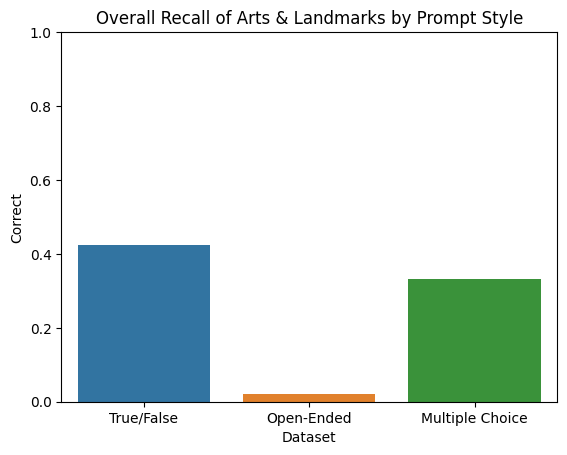

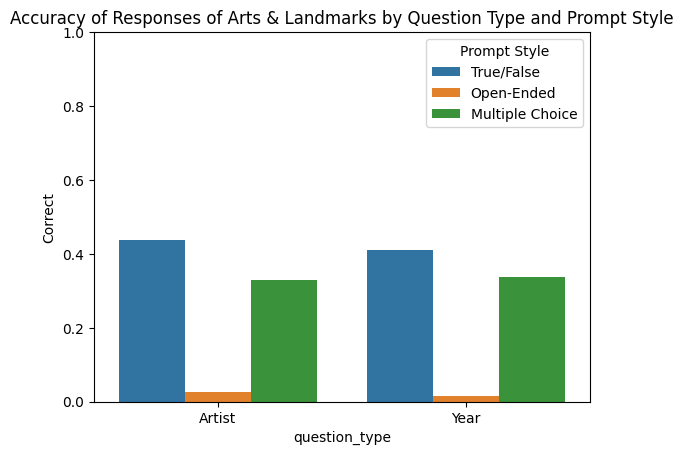

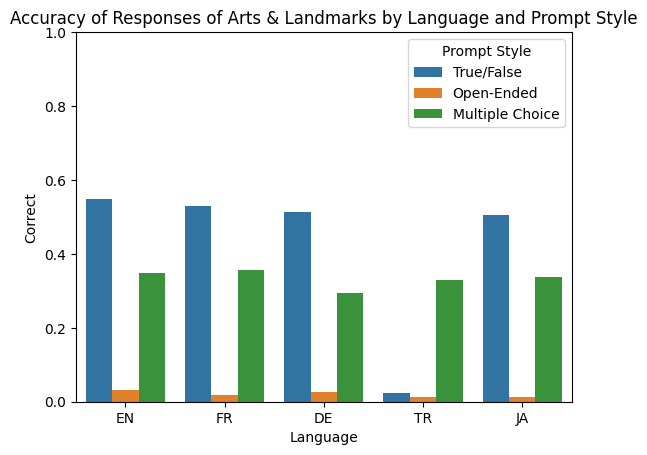

The biggest difference in accuracy is for language: EN with a difference of 0.5178410295164524


In [5]:
# Define a color palette
palette = {
    'True/False': '#1f77b4',  # blue
    'Open-Ended': '#ff7f0e',  # orange
    'Multiple Choice': '#2ca02c'  # green
}

# Plot overall accuracy by dataset
sns.barplot(x='Dataset', y='Correct', data=arts_df, ci=None, palette=palette)
plt.title('Overall Recall of Arts & Landmarks by Prompt Style')
plt.ylim(0, 1)
plt.show()

# Plot accuracy by question type and dataset
sns.barplot(x='question_type', y='Correct', hue='Dataset', data=arts_df, ci=None, palette=palette)
plt.title('Accuracy of Responses of Arts & Landmarks by Question Type and Prompt Style')
plt.ylim(0, 1)
plt.legend(title='Prompt Style')
plt.show()

# Plot accuracy by language and dataset
sns.barplot(x='Language', y='Correct', hue='Dataset', data=arts_df, ci=None, palette=palette)
plt.title('Accuracy of Responses of Arts & Landmarks by Language and Prompt Style')
plt.ylim(0, 1)
plt.legend(title='Prompt Style')
plt.show()

# Analyze differences between datasets
grouped = arts_df.groupby(['Language', 'Dataset'])['Correct'].mean().unstack()
differences = grouped.max(axis=1) - grouped.min(axis=1)
biggest_difference = differences.astype('float64').idxmax()

print(f'The biggest difference in accuracy is for language: {biggest_difference} with a difference of {differences.max()}')

# Melt the grouped DataFrame for plotting
melted_grouped = grouped.reset_index().melt(id_vars='Language', var_name='Dataset', value_name='Accuracy')


## Now we check for the People dataset

In [6]:
# Load the CSV files into DataFrames
oe_df2 = pd.read_csv('oe_people.csv')  # Ensure this path is correct
mc_df2 = pd.read_csv('mc_people.csv')  # Ensure this path is correct
tf_df2 = pd.read_csv('tf_people.csv')  # Ensure this path is correct

# Print the number of instances in each DataFrame
print(f"Open-Ended: {oe_df2.shape[0]} instances")
print(f"Multiple Choice: {mc_df2.shape[0]} instances")
print(f"True/False: {tf_df2.shape[0]} instances")

# Combine all datasets for comparison
tf_df2['Dataset'] = 'True/False'
oe_df2['Dataset'] = 'Open-Ended'
mc_df2['Dataset'] = 'Multiple Choice'
people_df = pd.concat([tf_df2, oe_df2, mc_df2], ignore_index=True)

# Drop the duplicate 'Compared_answer' column
people_df = people_df.loc[:, ~people_df.columns.duplicated()]

# Ensure 'Compared_Answer' is correctly interpreted as a boolean
people_df['Correct'] = people_df['Compared_Answer'] == 1

# Check if the 'Correct' column is correctly calculated
print(people_df[['Dataset', 'Correct']].groupby('Dataset').mean())

Open-Ended: 14525 instances
Multiple Choice: 14527 instances
True/False: 14527 instances
                  Correct
Dataset                  
Multiple Choice  0.489502
Open-Ended       0.056454
True/False       0.470297


In [7]:
people_df

,Question,Model_Answer,Actual_Answer,Compared_Answer,Language,Time_Taken,question_type,Dataset,Correct_Answer,Options,Correct_Letter,Correct
0,Meryem Uzerli is from Germany.,False. Meryem Uzerli is a,True,0,EN,1.279196,Nationality,True/False,NaN,NaN,NaN,False
1,Meryem Uzerli is a(n) lawyer.,False.\n\nMeryem Uzerli,False,1,EN,0.552896,Profession,True/False,NaN,NaN,NaN,True
2,Meryem Uzerli was born in 1983.0.,1\n\nAnswer: False.,True,0,EN,0.551836,Birth Year,True/False,NaN,NaN,NaN,False
3,Atiye is from Kingdom of the Netherlands.,Comment: False. Atiye is,False,1,EN,0.555718,Nationality,True/False,NaN,NaN,NaN,True
4,Atiye is a(n) songwriter.,Answer: True.\n\n###,True,1,EN,0.552605,Profession,True/False,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
43574,Barış Özcan hangi yıl doğdu?,Answer: B. The correct answer is 1986.\n\n---\...,NaN,0,TR,1.430097,Birth Year,Multiple Choice,NaN,"{'A': 1974.0, 'B': 1986.0, 'C': 1957.0, 'D': 1...",A,False
43575,Burhanettin Bulut hangi yıl doğdu?,Answer: C. Burhanettin Bulut was born in 1975....,NaN,0,TR,1.431777,Birth Year,Multiple Choice,NaN,"{'A': 1970.0, 'B': 1964.0, 'C': 1975.0, 'D': 1...",A,False
43576,Deniz Yavuzyılmaz hangi yıl doğdu?,Answer: B. Deniz Yavuzyılmaz is born in 1982.,NaN,0,TR,1.431193,Birth Year,Multiple Choice,NaN,"{'A': 1991.0, 'B': 1982.0, 'C': 1937.0, 'D': 1...",D,False
43577,Selçuk Tepeli hangi yıl doğdu?,Answer: C. Selçuk Tepeli was born in 1974.,NaN,1,TR,1.330086,Birth Year,Multiple Choice,NaN,"{'A': 1947.0, 'B': 1962.0, 'C': 1974.0, 'D': 2...",C,True


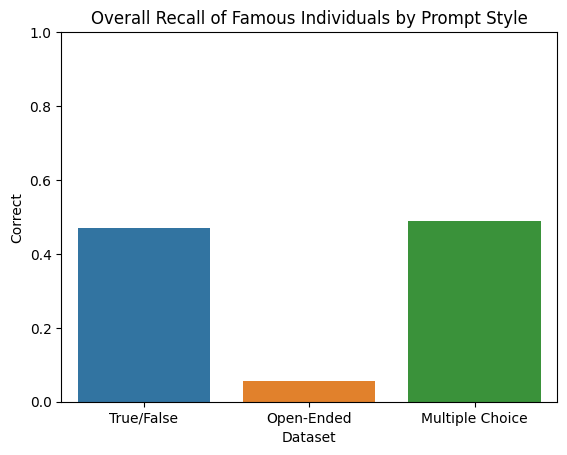

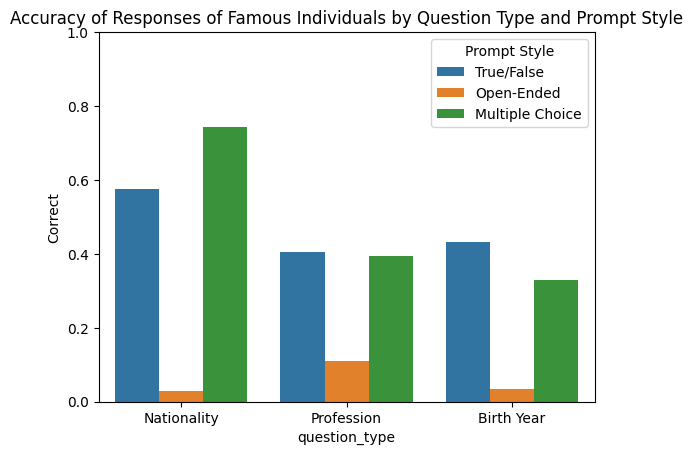

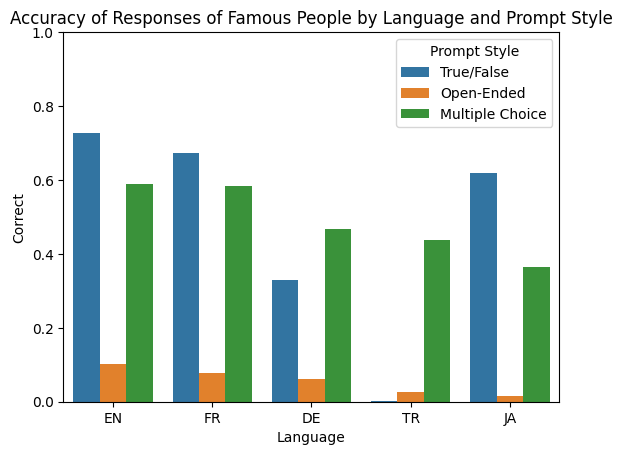

The biggest difference in accuracy is for language: EN with a difference of 0.6246998284734134


In [8]:
# Define a color palette
palette = {
    'True/False': '#1f77b4',  # blue
    'Open-Ended': '#ff7f0e',  # orange
    'Multiple Choice': '#2ca02c'  # green
}

# Plot overall accuracy by dataset
sns.barplot(x='Dataset', y='Correct', data=people_df, ci=None, palette=palette)
plt.title('Overall Recall of Famous Individuals by Prompt Style')
plt.ylim(0, 1)
plt.show()

# Plot accuracy by question type and dataset
sns.barplot(x='question_type', y='Correct', hue='Dataset', data=people_df, ci=None, palette=palette)
plt.title('Accuracy of Responses of Famous Individuals by Question Type and Prompt Style')
plt.ylim(0, 1)
plt.legend(title='Prompt Style')
plt.show()

# Plot accuracy by language and dataset
sns.barplot(x='Language', y='Correct', hue='Dataset', data=people_df, ci=None, palette=palette)
plt.title('Accuracy of Responses of Famous People by Language and Prompt Style')
plt.ylim(0, 1)
plt.legend(title='Prompt Style')
plt.show()

# Analyze differences between datasets
grouped = people_df.groupby(['Language', 'Dataset'])['Correct'].mean().unstack()
differences = grouped.max(axis=1) - grouped.min(axis=1)
biggest_difference = differences.astype('float64').idxmax()

print(f'The biggest difference in accuracy is for language: {biggest_difference} with a difference of {differences.max()}')

# Melt the grouped DataFrame for plotting
melted_grouped = grouped.reset_index().melt(id_vars='Language', var_name='Dataset', value_name='Accuracy')


In [9]:
# Calculate accuracy for Arts & Landmarks
accuracy_arts = arts_df.groupby(['Dataset', 'question_type', 'Language'])['Correct'].mean().reset_index()
accuracy_arts['Category'] = 'Arts & Landmarks'

# Calculate accuracy for Historical Events
accuracy_hist = combined_df.groupby(['Dataset', 'question_type', 'Language'])['Correct'].mean().reset_index()
accuracy_hist['Category'] = 'Historical Events'

# Calculate accuracy for Historical Events
accuracy_people = people_df.groupby(['Dataset', 'question_type', 'Language'])['Correct'].mean().reset_index()
accuracy_people['Category'] = 'People'


In [10]:
# Function to calculate accuracies for all question types
def calculate_accuracies(df):
    results = []
    for dataset in df['Dataset'].unique():
        for question_type in df['question_type'].unique():
            for language in df['Language'].unique():
                filtered_df = df[(df['Dataset'] == dataset) & (df['question_type'] == question_type) & (df['Language'] == language)]
                correct_count = filtered_df['Correct'].sum()
                total_count = filtered_df.shape[0]
                accuracy = correct_count / total_count if total_count > 0 else 0
                results.append({
                    'Dataset': dataset,
                    'question_type': question_type,
                    'Language': language,
                    'Accuracy': accuracy,
                    'Category': df['Category'].iloc[0]
                })
    return pd.DataFrame(results)

# Add Category column to both DataFrames
arts_df['Category'] = 'Arts & Landmarks'
combined_df['Category'] = 'Historical Events'
people_df['Category']= 'People'
# Calculate accuracies for each dataset
accuracy_arts = calculate_accuracies(arts_df)
accuracy_hist = calculate_accuracies(combined_df)
accuracy_people= calculate_accuracies(people_df)
# Display the calculated accuracies
print(accuracy_arts.head())
print(accuracy_hist.head())
print(accuracy_people.head())

      Dataset question_type Language  Accuracy          Category
0  True/False        Artist       EN  0.589324  Arts & Landmarks
1  True/False        Artist       FR  0.523362  Arts & Landmarks
2  True/False        Artist       DE  0.512384  Arts & Landmarks
3  True/False        Artist       TR  0.011829  Arts & Landmarks
4  True/False        Artist       JA  0.551107  Arts & Landmarks
      Dataset question_type Language  Accuracy           Category
0  True/False      Location       EN  0.878296  Historical Events
1  True/False      Location       FR  0.786680  Historical Events
2  True/False      Location       DE  0.690524  Historical Events
3  True/False      Location       TR  0.004564  Historical Events
4  True/False      Location       JA  0.763994  Historical Events
      Dataset question_type Language  Accuracy Category
0  True/False   Nationality       EN  0.936214   People
1  True/False   Nationality       FR  0.835913   People
2  True/False   Nationality       DE  0.285124

In [11]:
# Remove rows where 'question_type' is 'Profession' from the original DataFrame
accuracy_people = accuracy_people[accuracy_people['question_type'] != 'Profession']


In [12]:
accuracy_people

,Dataset,question_type,Language,Accuracy,Category
0,True/False,Nationality,EN,0.936214,People
1,True/False,Nationality,FR,0.835913,People
2,True/False,Nationality,DE,0.285124,People
3,True/False,Nationality,TR,0.001035,People
4,True/False,Nationality,JA,0.808050,People
10,True/False,Birth Year,EN,0.601660,People
11,True/False,Birth Year,FR,0.584807,People
12,True/False,Birth Year,DE,0.482830,People
13,True/False,Birth Year,TR,0.001043,People
14,True/False,Birth Year,JA,0.488058,People


In [13]:
# Print columns to verify the existence of the 'Correct' column
print("Columns in accuracy_arts:", accuracy_arts.columns)
print("Columns in accuracy_hist:", accuracy_hist.columns)
print("Columns in accuracy_people:", accuracy_people.columns)


Columns in accuracy_arts: Index(['Dataset', 'question_type', 'Language', 'Accuracy', 'Category'], dtype='object')
Columns in accuracy_hist: Index(['Dataset', 'question_type', 'Language', 'Accuracy', 'Category'], dtype='object')
Columns in accuracy_people: Index(['Dataset', 'question_type', 'Language', 'Accuracy', 'Category'], dtype='object')


In [14]:

# Remove 'Profession' from the accuracy_people DataFrame
#accuracy_people_filtered = accuracy_people[accuracy_people['question_type'] != 'Profession']
# Remove 'Profession' from the accuracy_people DataFrame
accuracy_people_filtered = accuracy_people

# Group by 'Dataset' and 'Language' to get the mean Accuracy value
accuracy_arts_grouped = accuracy_arts.groupby(['Dataset', 'Language'])['Accuracy'].mean().reset_index()
accuracy_hist_grouped = accuracy_hist.groupby(['Dataset', 'Language'])['Accuracy'].mean().reset_index()
accuracy_people_grouped = accuracy_people_filtered.groupby(['Dataset', 'Language'])['Accuracy'].mean().reset_index()

# Print grouped DataFrames to ensure they have data
print("Accuracy Arts Grouped:")
print(accuracy_arts_grouped.head())
print("\nAccuracy Hist Grouped:")
print(accuracy_hist_grouped.head())
print("\nAccuracy People Grouped:")
print(accuracy_people_grouped.head())

# Merge the accuracy DataFrames for comparison
merged_df_arts_hist = pd.merge(accuracy_arts_grouped, accuracy_hist_grouped, on=['Dataset', 'Language'], suffixes=('_Arts', '_Hist'))
comparison_df = pd.merge(merged_df_arts_hist, accuracy_people_grouped, on=['Dataset', 'Language'], suffixes=('', '_People'))

# Rename the 'Accuracy' column from the people DataFrame
comparison_df.rename(columns={'Accuracy': 'Accuracy_People'}, inplace=True)

# Calculate the differences
comparison_df['Difference_Arts_Hist'] = comparison_df['Accuracy_Arts'] - comparison_df['Accuracy_Hist']
comparison_df['Difference_Arts_People'] = comparison_df['Accuracy_Arts'] - comparison_df['Accuracy_People']
comparison_df['Difference_Hist_People'] = comparison_df['Accuracy_Hist'] - comparison_df['Accuracy_People']

# Display the comparison DataFrame
print("\nComparison DataFrame:")
print(comparison_df.head())

Accuracy Arts Grouped:
           Dataset Language  Accuracy
0  Multiple Choice       DE  0.293990
1  Multiple Choice       EN  0.349380
2  Multiple Choice       FR  0.357131
3  Multiple Choice       JA  0.336601
4  Multiple Choice       TR  0.329602

Accuracy Hist Grouped:
           Dataset Language  Accuracy
0  Multiple Choice       DE  0.712304
1  Multiple Choice       EN  0.712475
2  Multiple Choice       FR  0.737356
3  Multiple Choice       JA  0.557489
4  Multiple Choice       TR  0.693712

Accuracy People Grouped:
           Dataset Language  Accuracy
0  Multiple Choice       DE  0.503099
1  Multiple Choice       EN  0.665837
2  Multiple Choice       FR  0.641383
3  Multiple Choice       JA  0.369159
4  Multiple Choice       TR  0.505020

Comparison DataFrame:
           Dataset Language  Accuracy_Arts  Accuracy_Hist  Accuracy_People  \
0  Multiple Choice       DE       0.293990       0.712304         0.503099   
1  Multiple Choice       EN       0.349380       0.712475       

In [15]:
comparison_df

,Dataset,Language,Accuracy_Arts,Accuracy_Hist,Accuracy_People,Difference_Arts_Hist,Difference_Arts_People,Difference_Hist_People
0,Multiple Choice,DE,0.293990,0.712304,0.503099,-0.418314,-0.209109,0.209205
1,Multiple Choice,EN,0.349380,0.712475,0.665837,-0.363095,-0.316457,0.046638
2,Multiple Choice,FR,0.357131,0.737356,0.641383,-0.380225,-0.284252,0.095973
3,Multiple Choice,JA,0.336601,0.557489,0.369159,-0.220888,-0.032558,0.188330
4,Multiple Choice,TR,0.329602,0.693712,0.505020,-0.364110,-0.175418,0.188692
5,Open-Ended,DE,0.026189,0.162720,0.021200,-0.136531,0.004989,0.141521
6,Open-Ended,EN,0.031677,0.457404,0.052469,-0.425727,-0.020792,0.404935
7,Open-Ended,FR,0.019286,0.190343,0.021672,-0.171057,-0.002386,0.168671
8,Open-Ended,JA,0.012963,0.113969,0.016011,-0.101006,-0.003049,0.097957
9,Open-Ended,TR,0.012181,0.002282,0.040412,0.009899,-0.028231,-0.038130


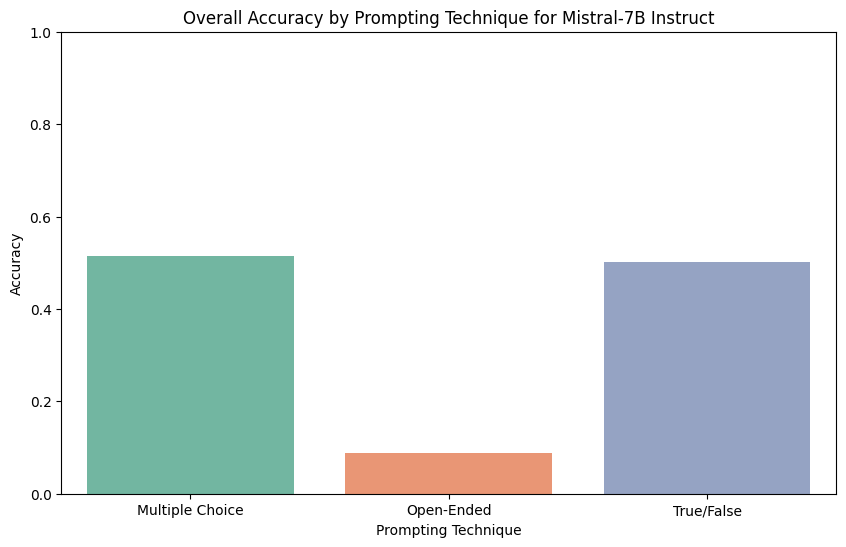

In [16]:
# Convert to DataFrames
df_arts = pd.DataFrame(accuracy_arts)
df_hist = pd.DataFrame(accuracy_hist)
df_people = pd.DataFrame(accuracy_people_grouped)

# Combine the DataFrames
combined_df = pd.concat([df_arts, df_hist, df_people])

# Group by prompting technique and calculate mean accuracy
overall_accuracy = combined_df.groupby('Dataset')['Accuracy'].mean().reset_index()

# Plot the overall accuracy for each prompting technique
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Accuracy', data=overall_accuracy, palette='Set2')
plt.title('Overall Accuracy by Prompting Technique for Mistral-7B Instruct')
plt.ylim(0, 1)
plt.xlabel('Prompting Technique')
plt.ylabel('Accuracy')
plt.show()

In [17]:
accuracy_arts

,Dataset,question_type,Language,Accuracy,Category
0,True/False,Artist,EN,0.589324,Arts & Landmarks
1,True/False,Artist,FR,0.523362,Arts & Landmarks
2,True/False,Artist,DE,0.512384,Arts & Landmarks
3,True/False,Artist,TR,0.011829,Arts & Landmarks
4,True/False,Artist,JA,0.551107,Arts & Landmarks
5,True/False,Year,EN,0.509857,Arts & Landmarks
6,True/False,Year,FR,0.536852,Arts & Landmarks
7,True/False,Year,DE,0.511872,Arts & Landmarks
8,True/False,Year,TR,0.034284,Arts & Landmarks
9,True/False,Year,JA,0.457689,Arts & Landmarks


  Language  Accuracy
0       DE  0.377455
1       EN  0.484426
2       FR  0.438911
3       JA  0.360723
4       TR  0.178248


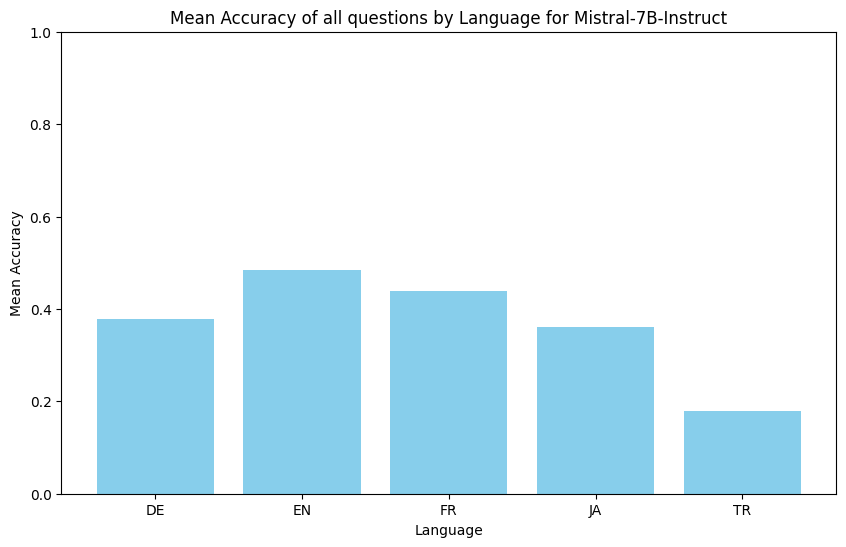

In [29]:
df = pd.DataFrame(combined_df)

# Group by Language and calculate the mean accuracy
mean_accuracy_by_language = df.groupby('Language')['Accuracy'].mean().reset_index()

print(mean_accuracy_by_language)

# Plot the mean accuracy by language
plt.figure(figsize=(10, 6))
plt.bar(mean_accuracy_by_language['Language'], mean_accuracy_by_language['Accuracy'], color='skyblue')
plt.title('Mean Accuracy of all questions by Language for Mistral-7B-Instruct')
plt.xlabel('Language')
plt.ylabel('Mean Accuracy')
plt.ylim(0, 1)
plt.show()

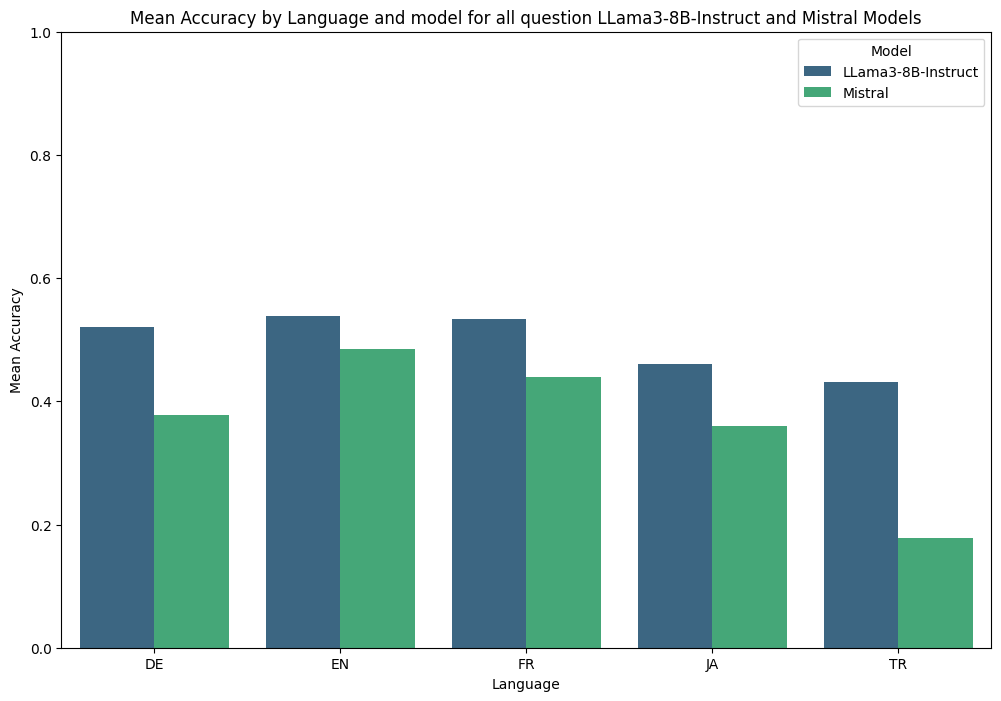

In [32]:
# Data for LLama3-8B-Instruct
llama_data = {
    'Language': ['DE', 'EN', 'FR', 'JA', 'TR'],
    'Accuracy': [0.521164, 0.538859, 0.534422, 0.461011, 0.431341],
    'Model': ['LLama3-8B-Instruct'] * 5
}

# Data for Mistral
mistral_data = {
    'Language': ['DE', 'EN', 'FR', 'JA', 'TR'],
    'Accuracy': [0.377455, 0.484426, 0.438911, 0.360723, 0.178248],
    'Model': ['Mistral'] * 5
}

# Combine data into a single DataFrame
combined_data = pd.concat([pd.DataFrame(llama_data), pd.DataFrame(mistral_data)], ignore_index=True)

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=combined_data, x='Language', y='Accuracy', hue='Model', palette='viridis')
plt.title('Mean Accuracy by Language and model for all question LLama3-8B-Instruct and Mistral Models')
plt.xlabel('Language')
plt.ylabel('Mean Accuracy')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.show()

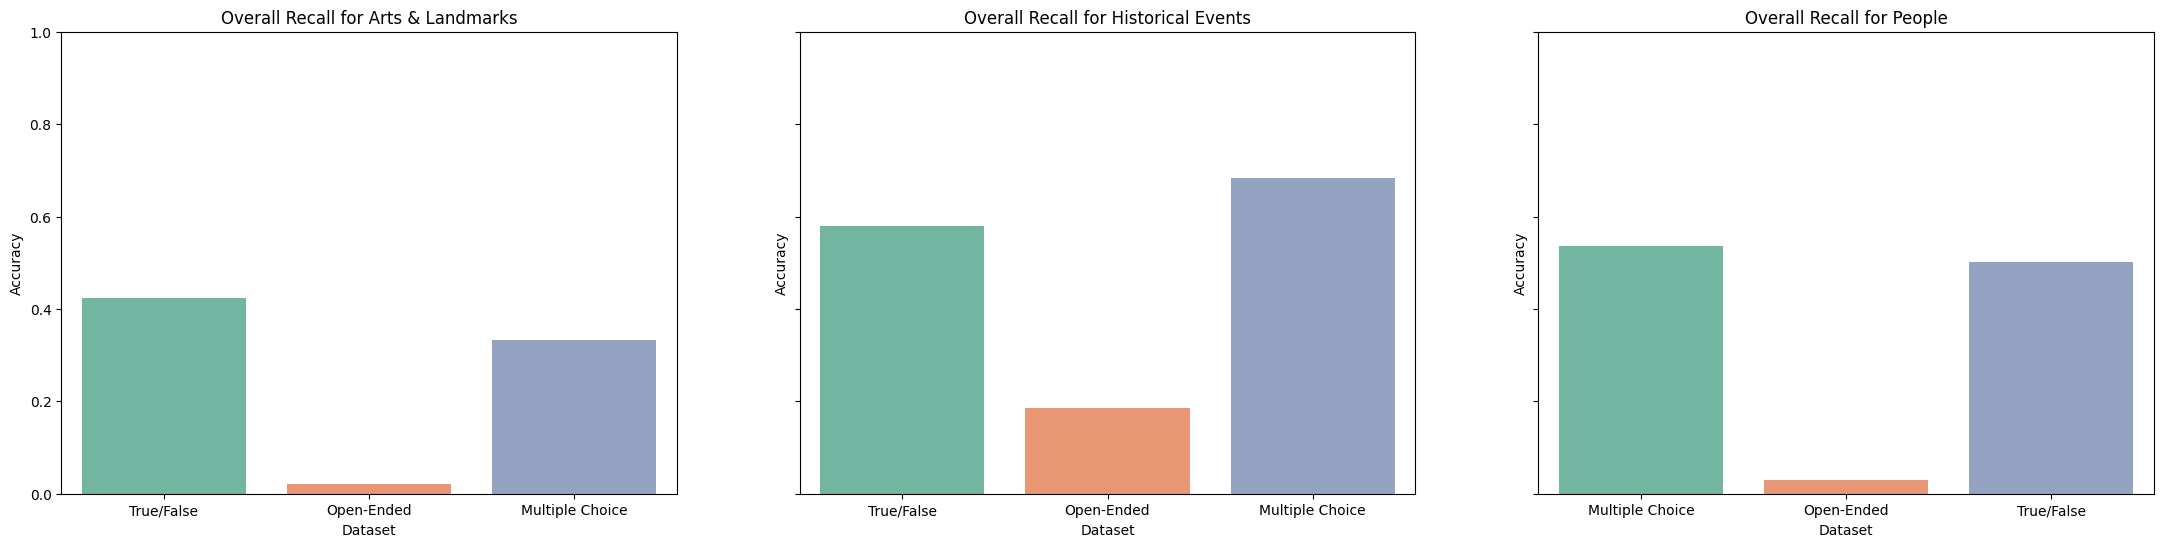

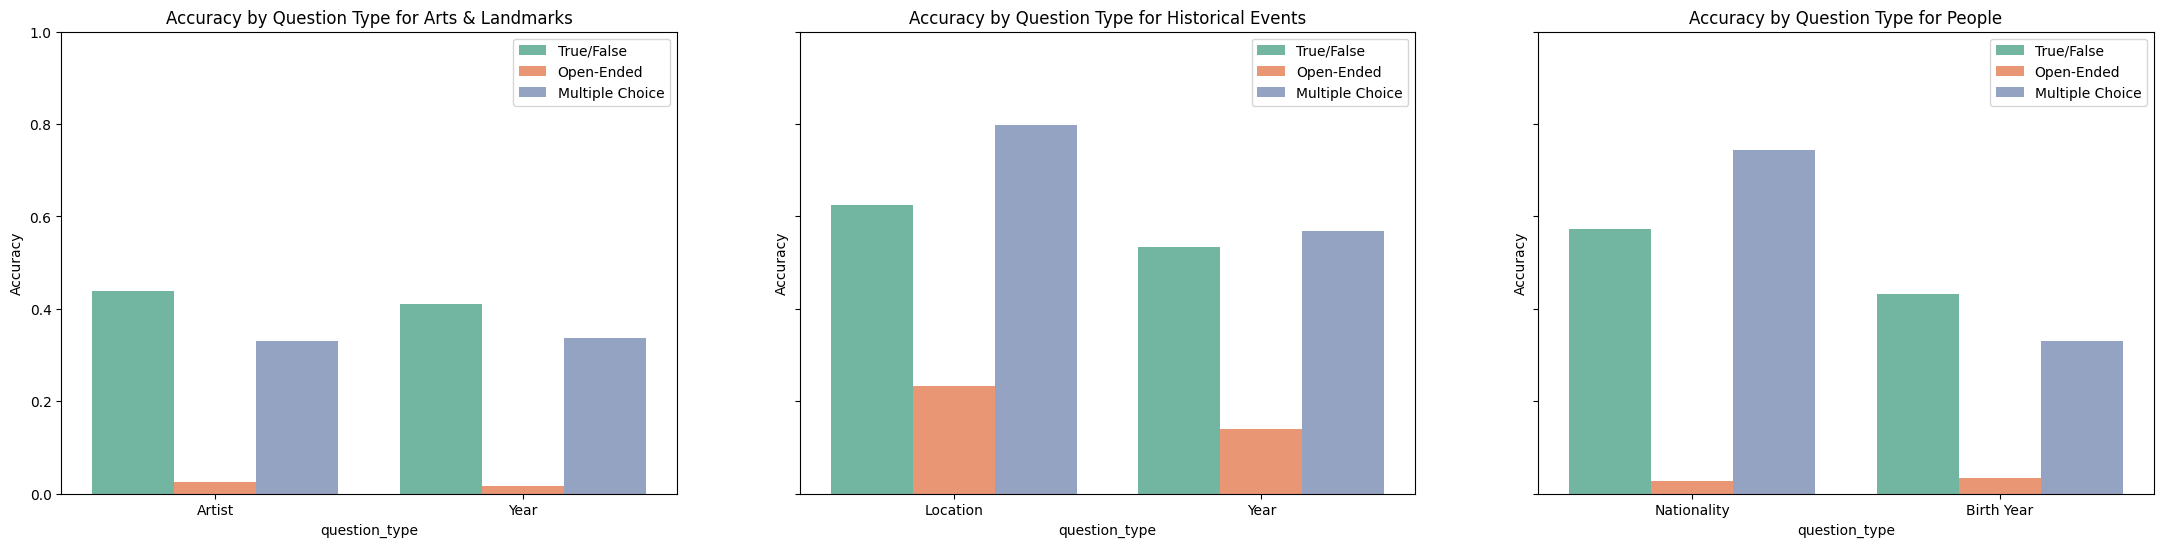

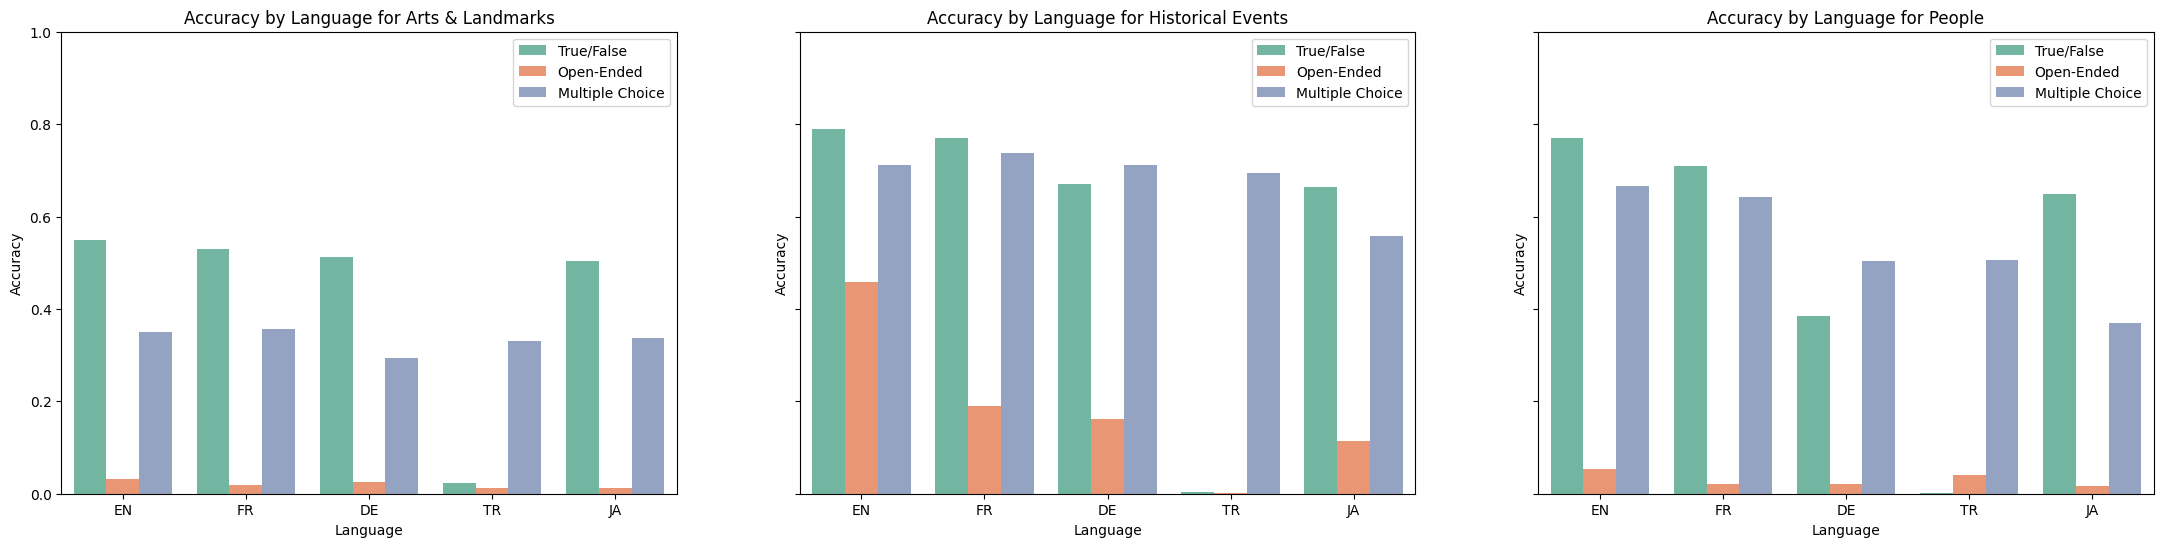

In [18]:
# Define a color palette
palette = sns.color_palette("Set2")

# Plot overall accuracy by dataset and category
fig, axes = plt.subplots(1, 3, figsize=(27, 6), sharey=True)
sns.barplot(x='Dataset', y='Accuracy', data=accuracy_arts, ci=None, palette=palette, ax=axes[0])
axes[0].set_title('Overall Recall for Arts & Landmarks')
axes[0].set_ylim(0, 1)

sns.barplot(x='Dataset', y='Accuracy', data=accuracy_hist, ci=None, palette=palette, ax=axes[1])
axes[1].set_title('Overall Recall for Historical Events')
axes[1].set_ylim(0, 1)

sns.barplot(x='Dataset', y='Accuracy', data=accuracy_people_grouped, ci=None, palette=palette, ax=axes[2])
axes[2].set_title('Overall Recall for People')
axes[2].set_ylim(0, 1)

plt.show()

# Plot accuracy by question type and dataset
fig, axes = plt.subplots(1, 3, figsize=(27, 6), sharey=True)
sns.barplot(x='question_type', y='Accuracy', hue='Dataset', data=accuracy_arts, ci=None, palette=palette, ax=axes[0])
axes[0].set_title('Accuracy by Question Type for Arts & Landmarks')
axes[0].set_ylim(0, 1)
axes[0].legend(loc='upper right')

sns.barplot(x='question_type', y='Accuracy', hue='Dataset', data=accuracy_hist, ci=None, palette=palette, ax=axes[1])
axes[1].set_title('Accuracy by Question Type for Historical Events')
axes[1].set_ylim(0, 1)
axes[1].legend(loc='upper right')

sns.barplot(x='question_type', y='Accuracy', hue='Dataset', data=accuracy_people_filtered, ci=None, palette=palette, ax=axes[2])
axes[2].set_title('Accuracy by Question Type for People')
axes[2].set_ylim(0, 1)
axes[2].legend(loc='upper right')

plt.show()

# Plot accuracy by language and dataset
fig, axes = plt.subplots(1, 3, figsize=(27, 6), sharey=True)
sns.barplot(x='Language', y='Accuracy', hue='Dataset', data=accuracy_arts, ci=None, palette=palette, ax=axes[0])
axes[0].set_title('Accuracy by Language for Arts & Landmarks')
axes[0].set_ylim(0, 1)
axes[0].legend(loc='upper right')

sns.barplot(x='Language', y='Accuracy', hue='Dataset', data=accuracy_hist, ci=None, palette=palette, ax=axes[1])
axes[1].set_title('Accuracy by Language for Historical Events')
axes[1].set_ylim(0, 1)
axes[1].legend(loc='upper right')

sns.barplot(x='Language', y='Accuracy', hue='Dataset', data=accuracy_people_filtered, ci=None, palette=palette, ax=axes[2])
axes[2].set_title('Accuracy by Language for People')
axes[2].set_ylim(0, 1)
axes[2].legend(loc='upper right')

plt.show()

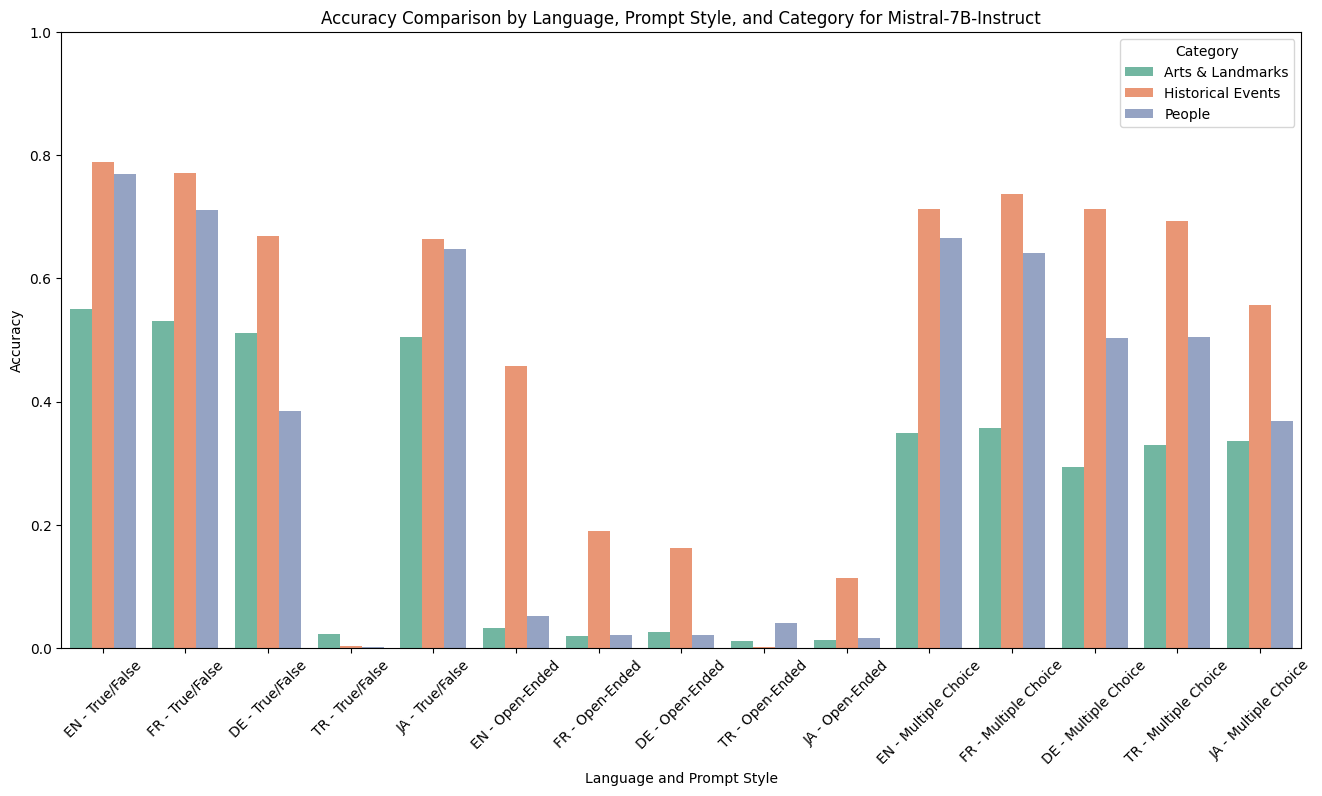

In [19]:
# Combine all datasets for comparison
combined_accuracy = pd.concat([accuracy_arts, accuracy_hist, accuracy_people_filtered])

# Create a combined column for Language and Dataset
combined_accuracy['Lang_Prompt'] = combined_accuracy['Language'] + ' - ' + combined_accuracy['Dataset']

# Plot accuracy by language and dataset
palette = sns.color_palette("Set2")
fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(x='Lang_Prompt', y='Accuracy', hue='Category', data=combined_accuracy, ci=None, palette=palette, ax=ax)

plt.title('Accuracy Comparison by Language, Prompt Style, and Category for Mistral-7B-Instruct')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.xlabel('Language and Prompt Style')
plt.show()

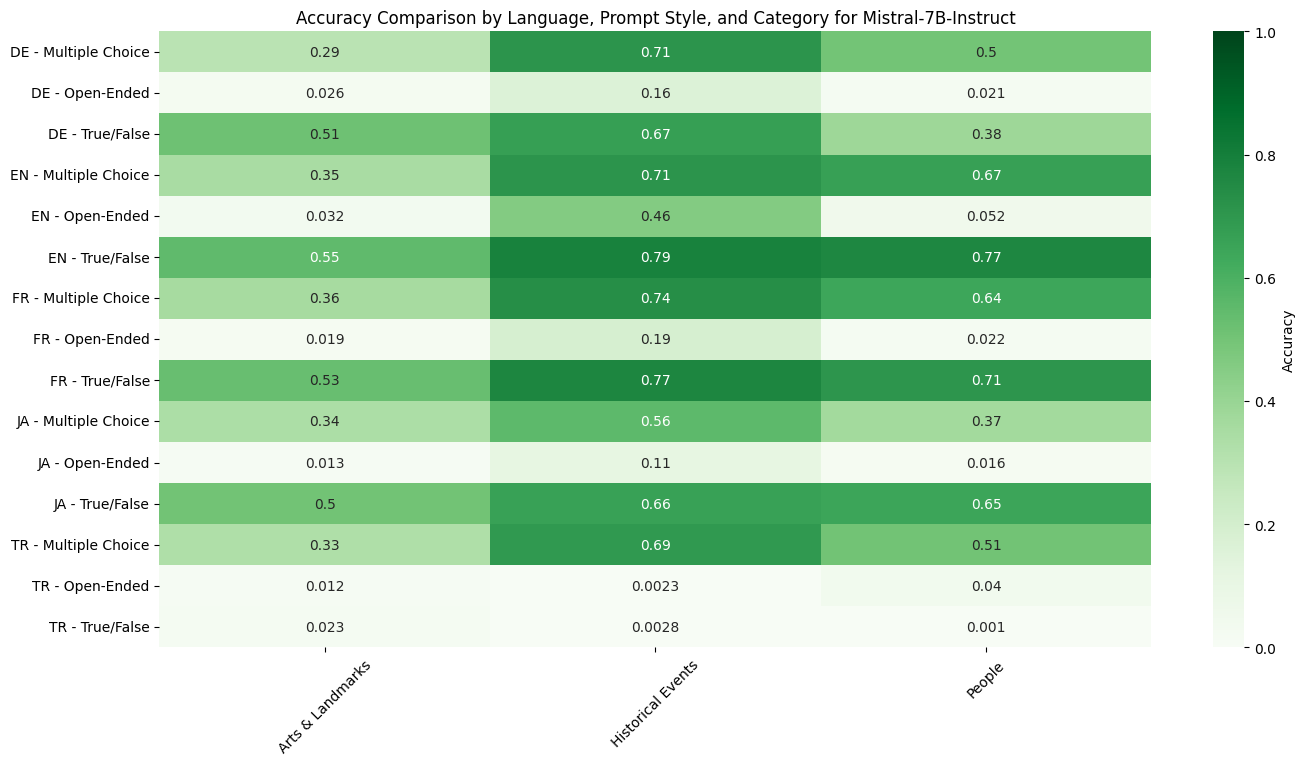

In [20]:

# Pivot the DataFrame for the heatmap
heatmap_data = combined_accuracy.pivot_table(index='Lang_Prompt', columns='Category', values='Accuracy')

# Plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Greens', vmin=0, vmax=1, cbar_kws={'label': 'Accuracy'})

plt.title('Accuracy Comparison by Language, Prompt Style, and Category for Mistral-7B-Instruct')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.show()


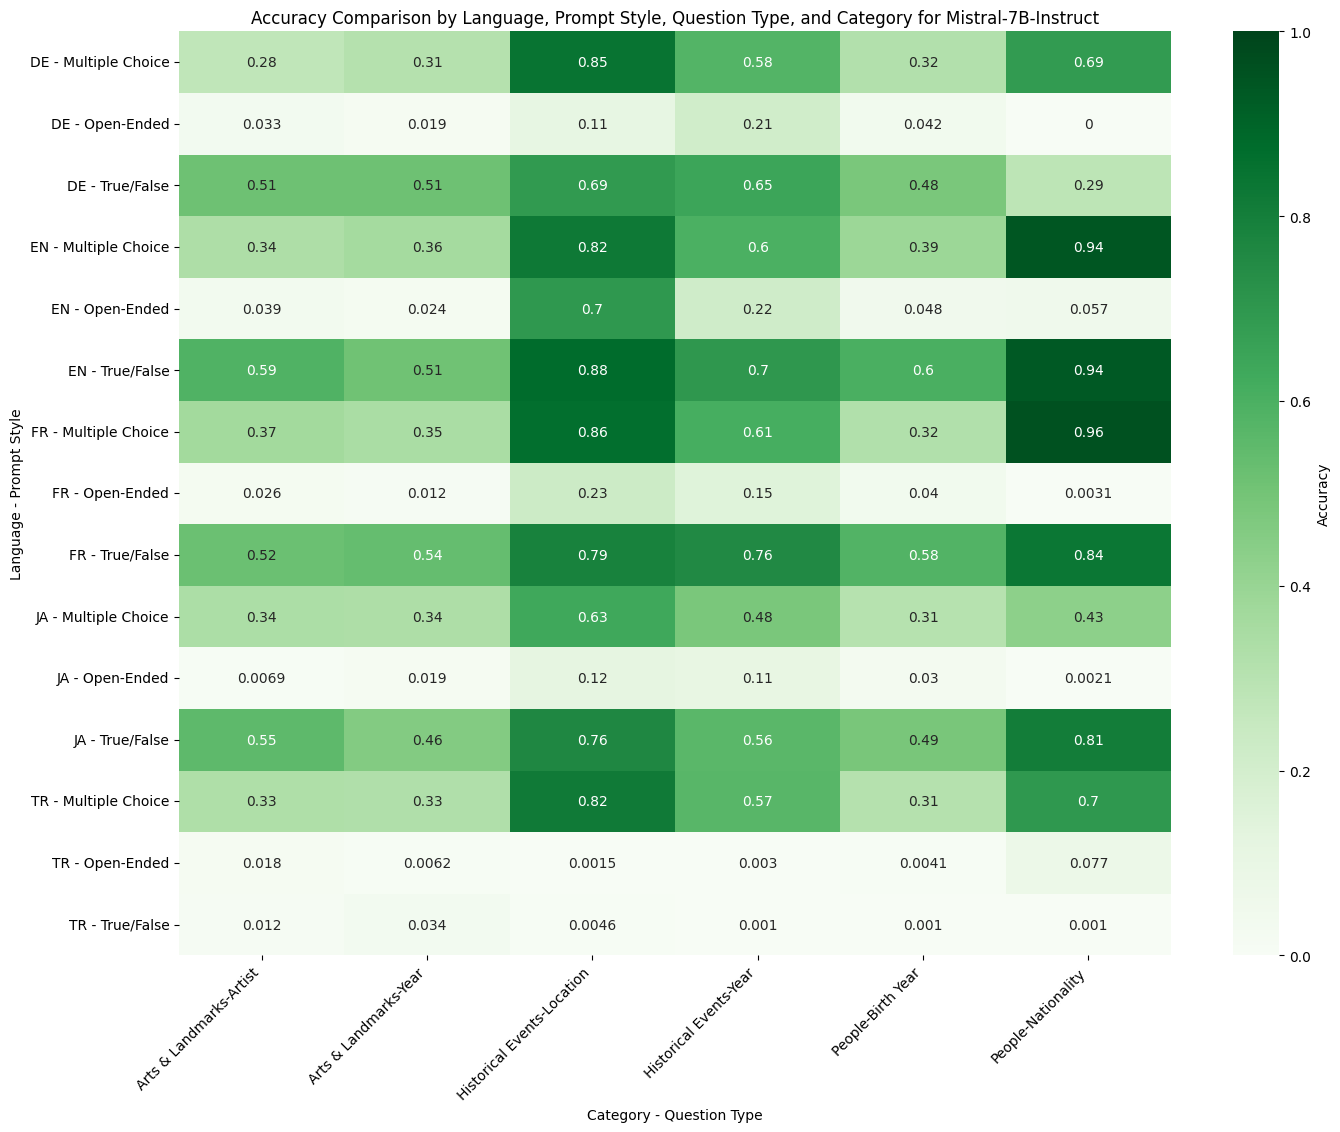

In [21]:
# Combine all datasets for comparison
combined_accuracy = pd.concat([accuracy_arts, accuracy_hist, accuracy_people_filtered])

# Create a combined column for Language and Dataset
combined_accuracy['Lang_Prompt'] = combined_accuracy['Language'] + ' - ' + combined_accuracy['Dataset']

# Pivot the DataFrame for the heatmap with question types on the x-axis
heatmap_data = combined_accuracy.pivot_table(index='Lang_Prompt', columns=['Category', 'question_type'], values='Accuracy')

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, annot=True, cmap='Greens', vmin=0, vmax=1, cbar_kws={'label': 'Accuracy'})

plt.title('Accuracy Comparison by Language, Prompt Style, Question Type, and Category for Mistral-7B-Instruct')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category - Question Type')
plt.ylabel('Language - Prompt Style')
plt.show()


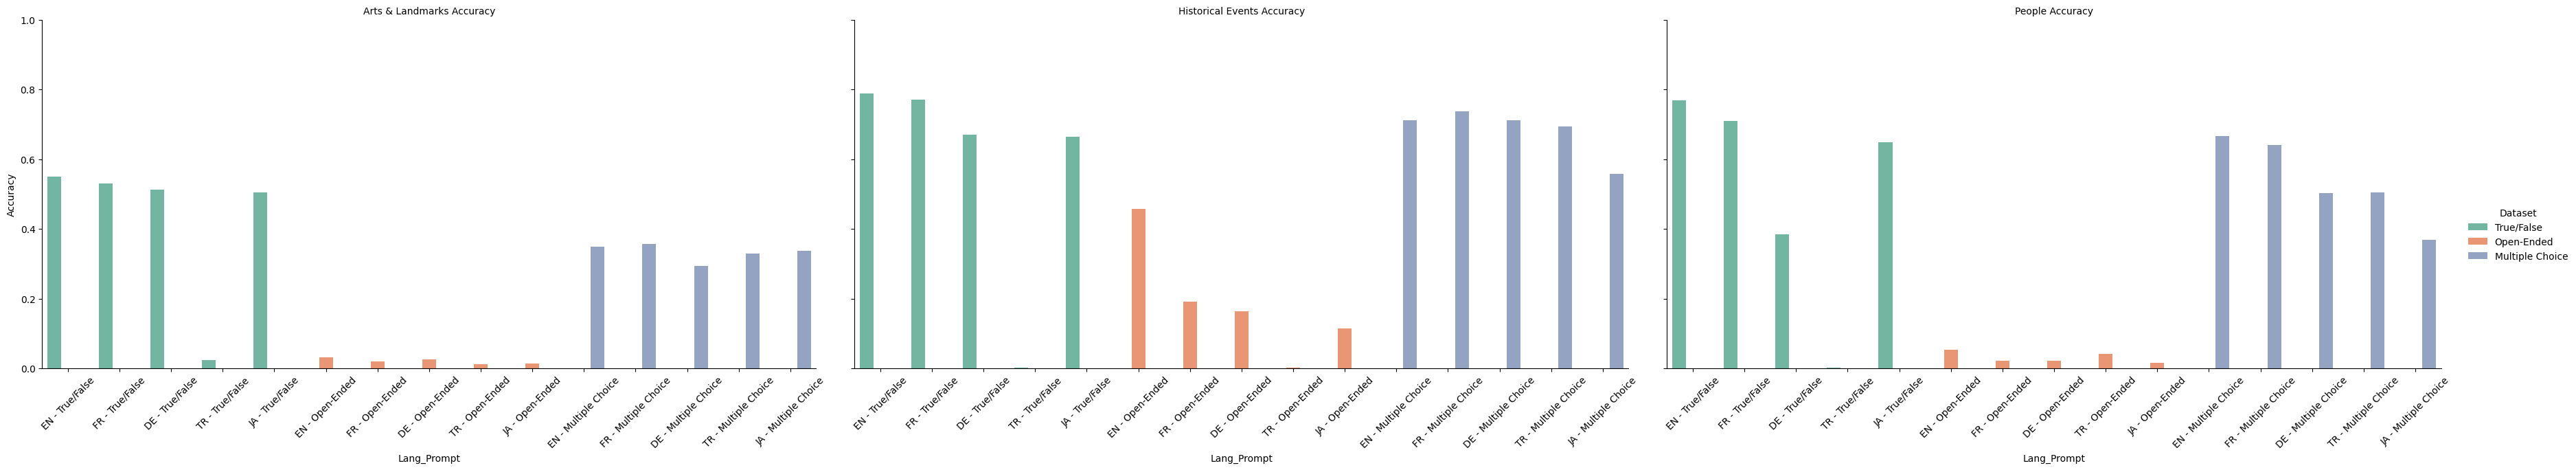

In [22]:
# Plot accuracy by language and dataset using faceted bar charts
g = sns.catplot(x='Lang_Prompt', y='Accuracy', hue='Dataset', col='Category', data=combined_accuracy, kind='bar', ci=None, palette=palette, height=6, aspect=2)

g.set_titles("{col_name} Accuracy")
g.set_xticklabels(rotation=45)
g.set(ylim=(0, 1))
plt.show()


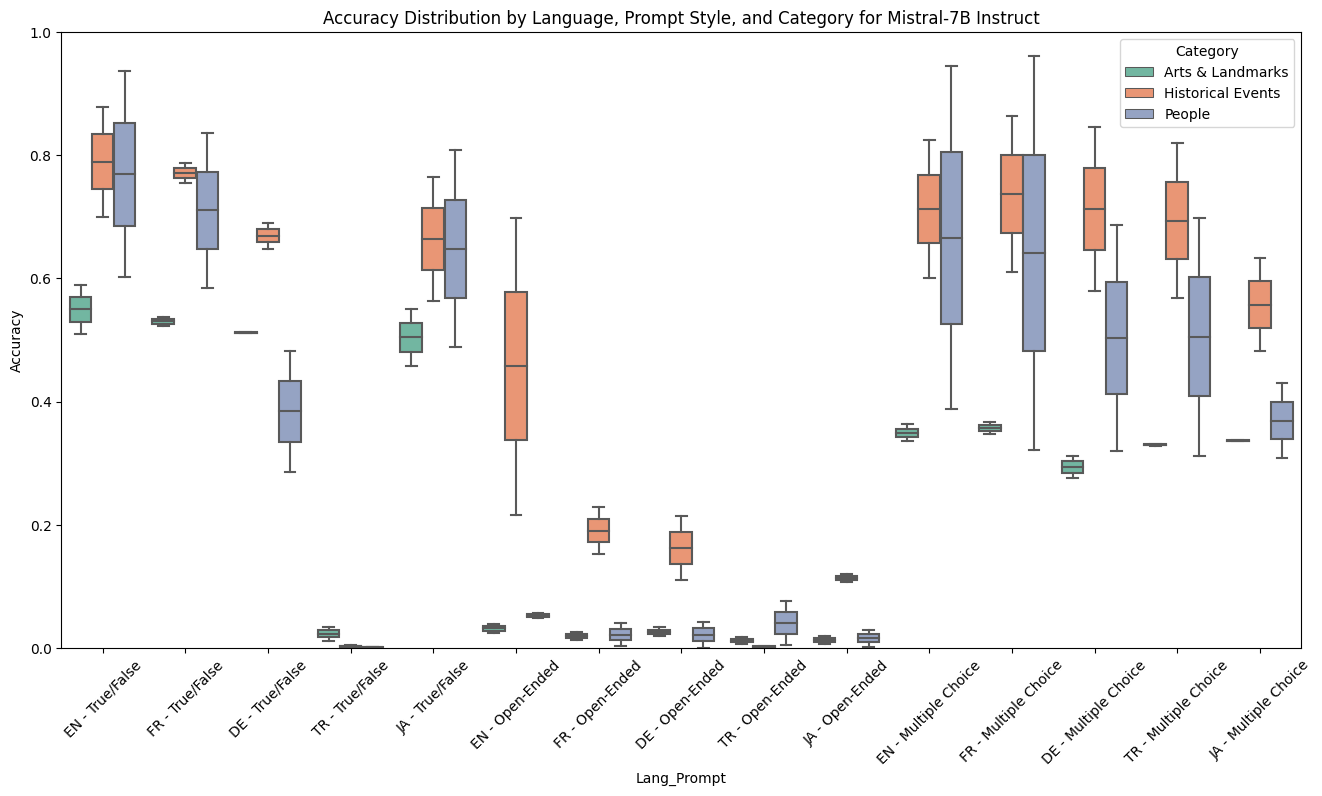

In [23]:
# Plot accuracy by language and dataset using box plot
fig, ax = plt.subplots(figsize=(16, 8))

sns.boxplot(x='Lang_Prompt', y='Accuracy', hue='Category', data=combined_accuracy, palette=palette, ax=ax)

plt.title('Accuracy Distribution by Language, Prompt Style, and Category for Mistral-7B Instruct')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()


In [24]:
# Create a pivot table to show all exact values
accuracy_table = combined_accuracy.pivot_table(values='Accuracy', index='Lang_Prompt', columns='Category')
accuracy_table = accuracy_table.reset_index()

# Display the table
print(accuracy_table)

Category           Lang_Prompt  Arts & Landmarks  Historical Events    People
0         DE - Multiple Choice          0.293990           0.712304  0.503099
1              DE - Open-Ended          0.026189           0.162720  0.021200
2              DE - True/False          0.512128           0.669443  0.383977
3         EN - Multiple Choice          0.349380           0.712475  0.665837
4              EN - Open-Ended          0.031677           0.457404  0.052469
5              EN - True/False          0.549591           0.789047  0.768937
6         FR - Multiple Choice          0.357131           0.737356  0.641383
7              FR - Open-Ended          0.019286           0.190343  0.021672
8              FR - True/False          0.530107           0.770906  0.710360
9         JA - Multiple Choice          0.336601           0.557489  0.369159
10             JA - Open-Ended          0.012963           0.113969  0.016011
11             JA - True/False          0.504398           0.663

In [25]:
import pandas as pd

# Assuming combined_accuracy is your DataFrame
table_data = combined_accuracy.pivot_table(index=['Lang_Prompt'], columns='Category', values='Accuracy')
print(table_data)


Category              Arts & Landmarks  Historical Events    People
Lang_Prompt                                                        
DE - Multiple Choice          0.293990           0.712304  0.503099
DE - Open-Ended               0.026189           0.162720  0.021200
DE - True/False               0.512128           0.669443  0.383977
EN - Multiple Choice          0.349380           0.712475  0.665837
EN - Open-Ended               0.031677           0.457404  0.052469
EN - True/False               0.549591           0.789047  0.768937
FR - Multiple Choice          0.357131           0.737356  0.641383
FR - Open-Ended               0.019286           0.190343  0.021672
FR - True/False               0.530107           0.770906  0.710360
JA - Multiple Choice          0.336601           0.557489  0.369159
JA - Open-Ended               0.012963           0.113969  0.016011
JA - True/False               0.504398           0.663389  0.648054
TR - Multiple Choice          0.329602          

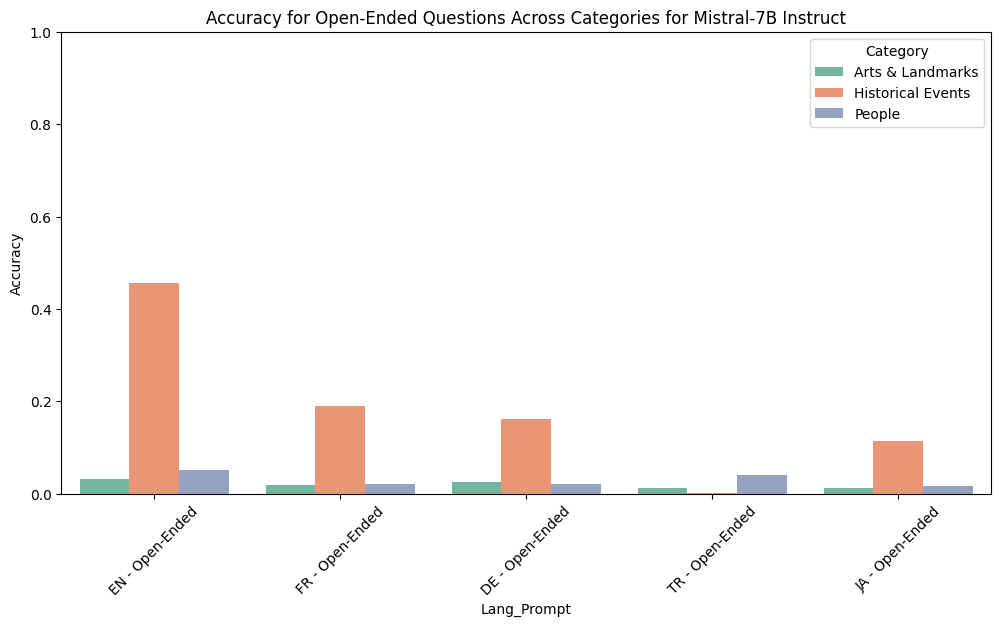

In [26]:
# Filter data for Open-Ended questions
open_ended_data = combined_accuracy[combined_accuracy['Dataset'] == 'Open-Ended']

# Plot the Open-Ended questions
plt.figure(figsize=(12, 6))
sns.barplot(x='Lang_Prompt', y='Accuracy', hue='Category', data=open_ended_data, ci=None, palette='Set2')
plt.title('Accuracy for Open-Ended Questions Across Categories for Mistral-7B Instruct')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()
